# **Heart Attacks Predictive Model**

In [ ]:
# Install necessary modules
!pip install pycaret

In [ ]:
!pip install streamlit

In [8]:
# Import necessary modules
from pycaret.classification import *
import streamlit as st
import pandas as pd
import numpy as np

In [9]:
# Load data
heart_attack_df = pd.read_csv('heart_dieses.csv')
heart_attack_df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [10]:
# Transform water quality feature into binary (safe or not_safe)
heart_attack_df.HeartDisease = np.where(heart_attack_df.HeartDisease>= 1,'Heart attack', 'No Heart attack')
heart_attack_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,No Heart attack
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,Heart attack
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,No Heart attack
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,Heart attack
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,No Heart attack


In [11]:
len(heart_attack_df[heart_attack_df['HeartDisease']==0])

0

In [12]:
len(heart_attack_df[heart_attack_df['HeartDisease']==1])

0

In [13]:
# find the minimum of each column
minValues = print(heart_attack_df.min())

Age                         28
Sex                          F
ChestPainType              ASY
RestingBP                    0
Cholesterol                  0
FastingBS                    0
RestingECG                 LVH
MaxHR                       60
ExerciseAngina               N
Oldpeak                   -2.6
ST_Slope                  Down
HeartDisease      Heart attack
dtype: object


In [14]:
# find the minimum of each column
minValues = print(heart_attack_df.max())

Age                            77
Sex                             M
ChestPainType                  TA
RestingBP                     200
Cholesterol                   603
FastingBS                       1
RestingECG                     ST
MaxHR                         202
ExerciseAngina                  Y
Oldpeak                       6.2
ST_Slope                       Up
HeartDisease      No Heart attack
dtype: object


In [15]:
heart_attack_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000


In [16]:
heart_attack_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 86.2+ KB


In [17]:
#Applying preprocessing techniques
Heart_attack_model = setup(heart_attack_df, target = 'HeartDisease', session_id = 123, use_gpu = True,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True)

,Description,Value
0,session_id,123
1,Target,HeartDisease
2,Target Type,Binary
3,Label Encoded,"Heart attack: 0, No Heart attack: 1"
4,Original Data,"(918, 12)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
2022-09-29 23:22:52.320 INFO    logs: create_model_container: 0
INFO:logs:master_model_container: 0
2022-09-29 23:22:52.326 INFO    logs: master_model_container: 0
INFO:logs:display_container: 1
2022-09-29 23:22:52.329 INFO    logs: display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='HeartDisease',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerica

In [18]:
Heart_attack_model_best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8706,0.9297,0.8241,0.8843,0.8521,0.7375,0.7402,0.032
lr,Logistic Regression,0.8675,0.9272,0.8310,0.8737,0.8504,0.7317,0.7344,0.093
ridge,Ridge Classifier,0.8675,0.0000,0.8207,0.8801,0.8483,0.7311,0.7338,0.056
et,Extra Trees Classifier,0.8582,0.9198,0.8207,0.8639,0.8388,0.7127,0.7170,0.997
gbc,Gradient Boosting Classifier,0.8566,0.9165,0.8310,0.8530,0.8392,0.7101,0.7138,0.336
ada,Ada Boost Classifier,0.8520,0.9123,0.8517,0.8306,0.8396,0.7023,0.7046,0.311
nb,Naive Bayes,0.8489,0.9116,0.8448,0.8285,0.8351,0.6959,0.6983,0.016
lightgbm,Light Gradient Boosting Machine,0.8473,0.9148,0.8103,0.8493,0.8269,0.6906,0.6943,0.117
knn,K Neighbors Classifier,0.8443,0.8952,0.8241,0.8313,0.8266,0.6854,0.6869,0.215
rf,Random Forest Classifier,0.8442,0.9113,0.7828,0.8665,0.8198,0.6833,0.6892,1.925


INFO:logs:create_model_container: 14
2022-09-29 23:23:43.601 INFO    logs: create_model_container: 14
INFO:logs:master_model_container: 14
2022-09-29 23:23:43.604 INFO    logs: master_model_container: 14
INFO:logs:display_container: 2
2022-09-29 23:23:43.608 INFO    logs: display_container: 2
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
2022-09-29 23:23:43.611 INFO    logs: LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................
2022-09-29 23:23:43.615 INFO    logs: compare_models() succesfully completed......................................


In [19]:
Heart_attack_model_best = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8923,0.9646,0.8966,0.8667,0.8814,0.7828,0.7832
1,0.8923,0.9492,0.8621,0.8929,0.8772,0.7814,0.7817
2,0.8594,0.8749,0.7931,0.8846,0.8364,0.7137,0.7170
3,0.8594,0.9547,0.7931,0.8846,0.8364,0.7137,0.7170
4,0.7969,0.8581,0.7931,0.7667,0.7797,0.5914,0.5916
5,0.8750,0.9438,0.8621,0.8621,0.8621,0.7478,0.7478
6,0.9375,0.9576,0.8621,1.0000,0.9259,0.8724,0.8796
7,0.8125,0.9054,0.7241,0.8400,0.7778,0.6171,0.6222
8,0.8750,0.9360,0.7931,0.9200,0.8519,0.7448,0.7509


INFO:logs:create_model_container: 15
2022-09-29 23:23:44.474 INFO    logs: create_model_container: 15
INFO:logs:master_model_container: 15
2022-09-29 23:23:44.488 INFO    logs: master_model_container: 15
INFO:logs:display_container: 3
2022-09-29 23:23:44.496 INFO    logs: display_container: 3
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
2022-09-29 23:23:44.503 INFO    logs: LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................
2022-09-29 23:23:44.511 INFO    logs: create_model() succesfully completed......................................


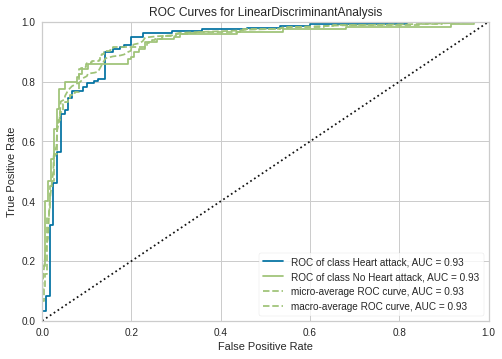

INFO:logs:Visual Rendered Successfully
2022-09-29 23:23:45.581 INFO    logs: Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................
2022-09-29 23:23:45.862 INFO    logs: plot_model() succesfully completed......................................


In [20]:
plot_model(Heart_attack_model_best)

In [21]:
save_model(Heart_attack_model_best, 'Heart_attack_pre_deployment_model')

INFO:logs:Initializing save_model()
2022-09-29 23:23:45.901 INFO    logs: Initializing save_model()
INFO:logs:save_model(model=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001), model_name=Heart_attack_pre_deployment_model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='HeartDisease',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
              

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='HeartDisease',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                 ('dfs',
                  DFS_Classic(interactions=['multiply'],
                              ml_usecase='classification', n_jobs=-1,
                              random_state=123, subclass='binary',
                

In [22]:
#Deploying the trained model with streamlit
from pycaret.classification import load_model, predict_model
import streamlit as st
import pandas as pd
import numpy as np

model = load_model('Heart_attack_pre_deployment_model')

def predict(model, input_df):
    predictions_df = predict_model(estimator=model, data=input_df)
    predictions = predictions_df['Label'][0]
    return predictions

def run():

    from PIL import Image
    add_selectbox = st.sidebar.selectbox(
    "How would you like to predict?",
    ("Online", "Batch"))

    st.sidebar.info('This app is created to predict heart attacks by Okeke')

    st.title("Heart Attacks Predictive Framework")

    if add_selectbox == 'Online':

        #age = st.number_input('Age', min_value=1, max_value=100, value=25)
        Age = st.sidebar.slider('Age', min_value=1, max_value=100, value=15, step = 1)
        Sex = st.selectbox('Sex', ['male', 'female'])
        ChestPainType = st.text_input("ChestPainType", 'ASY')
        RestingBP = st.number_input('RestingBP', min_value=0, max_value=200, value=120)
        Cholesterol = st.number_input('Cholesterol', min_value=0, max_value=800, value=50)
        FastingBS =  st.sidebar.slider('FastingBS', min_value=0.0, max_value=1.0, value=0.5, step = 0.1)
        RestingECG = st.text_input("RestingECG", 'ST')
        MaxHR = st.number_input('MaxHR', min_value=10, max_value=250, value=50)
        ExerciseAngina = st.selectbox('ExerciseAngina', ['Y', 'N'])
        Oldpeak = st.number_input('Oldpeak', min_value=-0.0, max_value=10.0, value=3.0)
        ST_Slope = st.text_input("ST_Slope", 'Up')
       
        output=""

        input_dict = {'Age' : Age, 'Sex' : Sex, 'ChestPainType' : ChestPainType, 'RestingBP' : RestingBP, 'Cholesterol' : Cholesterol, 'FastingBS' : FastingBS, 
                      'RestingECG' : RestingECG,'MaxHR' : MaxHR,'ExerciseAngina' : ExerciseAngina,'Oldpeak' : Oldpeak, 'ST_Slope' : ST_Slope}
        input_df = pd.DataFrame([input_dict])

        if st.button("Predict"):
            output = predict(model=model, input_df=input_df)
            output = '$' + str(output)

        st.success('The patient had: {}'.format(output))

    if add_selectbox == 'Batch':

        file_upload = st.file_uploader("Upload csv file for predictions", type=["csv"])

        if file_upload is not None:
            data = pd.read_csv(file_upload)
            predictions = predict_model(estimator=model,data=data)
            st.write(predictions)

if __name__ == '__main__':
    run()

INFO:logs:Initializing load_model()
2022-09-29 23:23:46.373 INFO    logs: Initializing load_model()
INFO:logs:load_model(model_name=Heart_attack_pre_deployment_model, platform=None, authentication=None, verbose=True)
2022-09-29 23:23:46.384 INFO    logs: load_model(model_name=Heart_attack_pre_deployment_model, platform=None, authentication=None, verbose=True)
  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]
2022-09-29 23:23:46.559 
  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]


Transformation Pipeline and Model Successfully Loaded
